## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. Cells in which "# YOUR CODE HERE" is found are the cells where your graded code should be written.
2. In order to test out or debug your code you may also create notebook cells or edit existing notebook cells other than "# YOUR CODE HERE". We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**. 
3. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
4. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will lose points for your work in that section.
5. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
6. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the autograder will ignore the modified "assert" statement. Make sure you don't edit the assert statements.
7. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
8. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.
9. The **Grading** section at the end of the document (before the **Feedback** section) contains some code for our autograder on GradeScope. You are expected to fail this block of code in your Jupyter environment. DO NOT edit this block of code, or you may not get points for your assignment.
10. Finally, **make sure you run "Kernel > Restart and Run All"** and pass all the asserts before submitting. If you don't restart the kernel, there may be some code that you ran and deleted that is still being used and that was why your asserts were passing.

# Feature Extraction

In this exercise you'll apply a variety of dimensionality reduction to a relatively high dimensional dataset and investigate how they perform in visualizing the data as well as working with a simple supervised learning algorithm.


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import scipy

np.random.seed(0)
plt.style.use("ggplot")

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, SpectralEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score


In [3]:
data = load_breast_cancer()

In [4]:
features = pd.DataFrame(data["data"], columns=data["feature_names"])
target = pd.Series(data["target"], name="class")
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [9]:
y_train

338    1
427    1
406    1
96     1
490    1
      ..
277    0
9      0
359    1
192    1
559    1
Name: class, Length: 455, dtype: int64

First, we'll visualize the data with Principal Component Analysis. We can use the scikit-learn [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and [KernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html?highlight=kernelpca) classes. We'll want to visualize the data in just 2 dimensions.

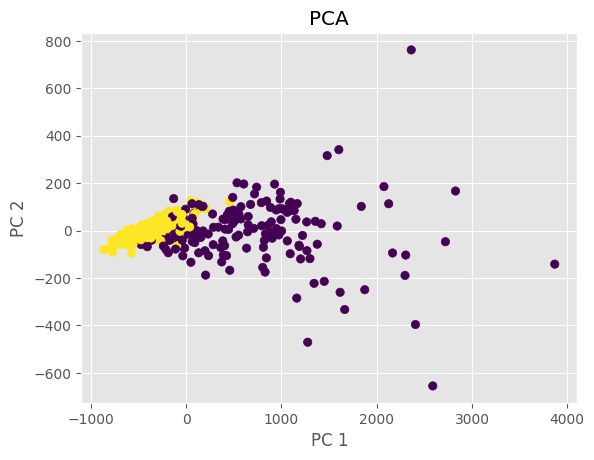

In [10]:
pca = PCA(n_components=2)
# We can use fit transform to fit and transform the training data
X_train_pca = pca.fit_transform(X_train)


plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
plt.title("PCA")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


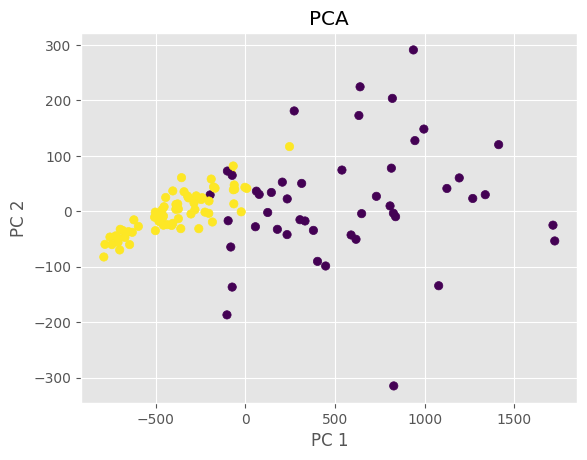

In [11]:
# When we decide to visualize the test data, we now have to make sure we **do not fit**
# We just use the transform method

X_test_pca = pca.transform(X_test)

plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test)
plt.title("PCA")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

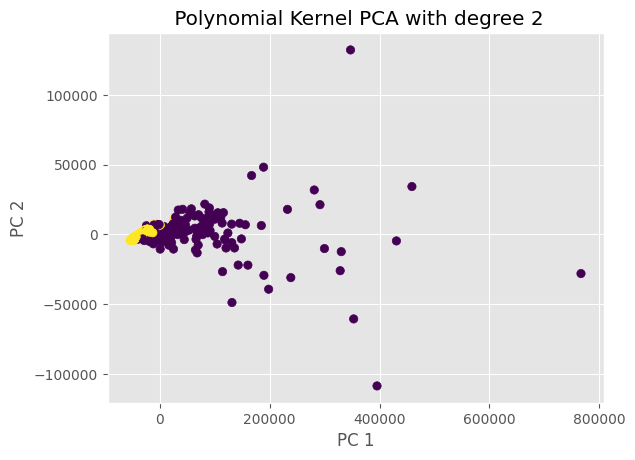

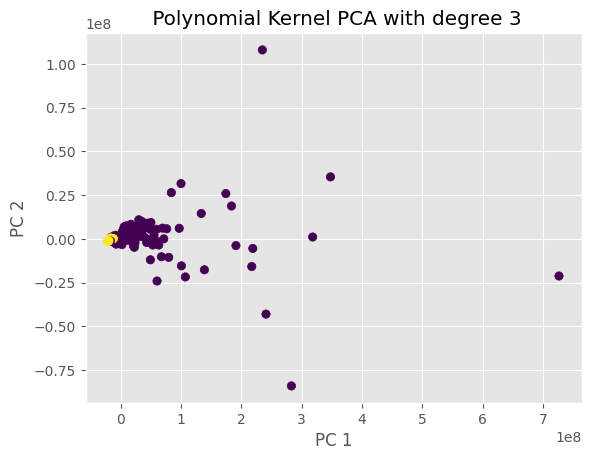

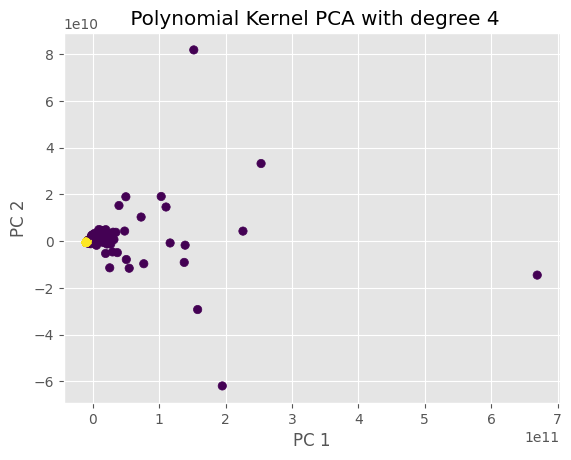

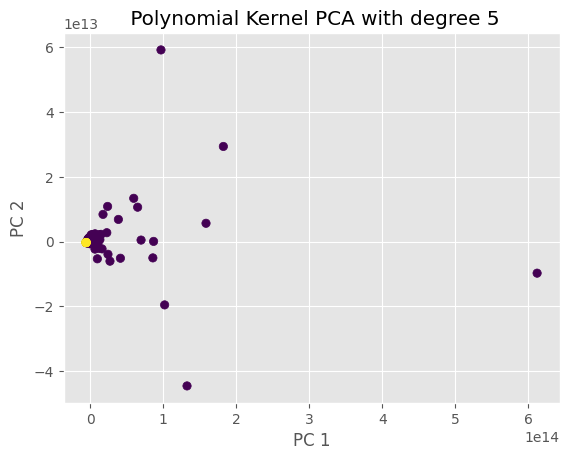

In [12]:
for degree in [2,3,4,5]:
    
    kpca = KernelPCA(n_components=2, kernel="poly", degree=degree)
    X_train_kpca = kpca.fit_transform(X_train)
    
    plt.scatter(X_train_kpca[:,0], X_train_kpca[:,1], c=y_train)
    plt.title(f" Polynomial Kernel PCA with degree {degree}")
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.show()
    

Next, we'll try out the t-Distributed Stochastic Neighborhood Embeddings. We can use the [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#sklearn.manifold.TSNE) class from scikit-learn. We'll start by doing a hyperparameter search to see multiple variations of visualizations. As we covered in the lecture, this is recommended to make sure we're understanding the neighborhoods identified in the data.

In [13]:
perplexities = [5, 20, 30, 50, 100]
iters = [250, 1000, 3000]

Create an embedding using [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) using number of iterations (n), a random state of 0 and specified perplexity. Save that embedding to tsne_embedding.

The next code block will take some time to run, you might want to come back to this later or continue to the next part while it runs.

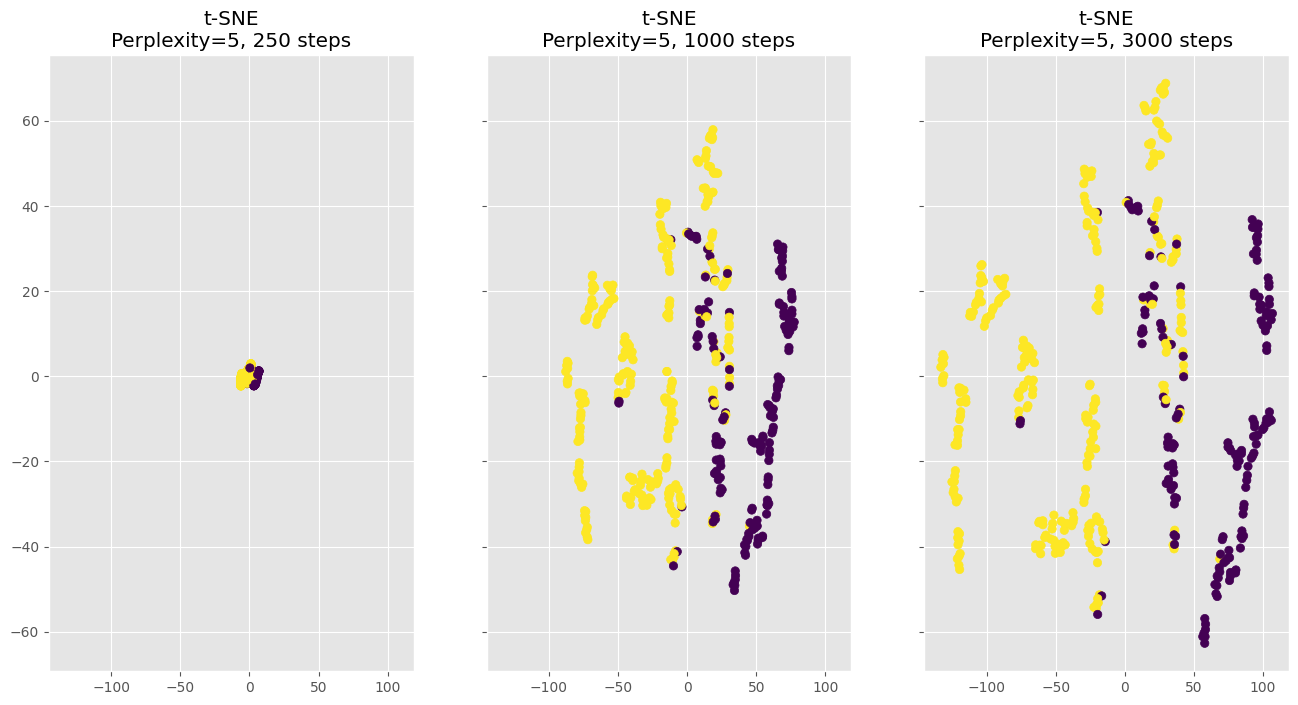

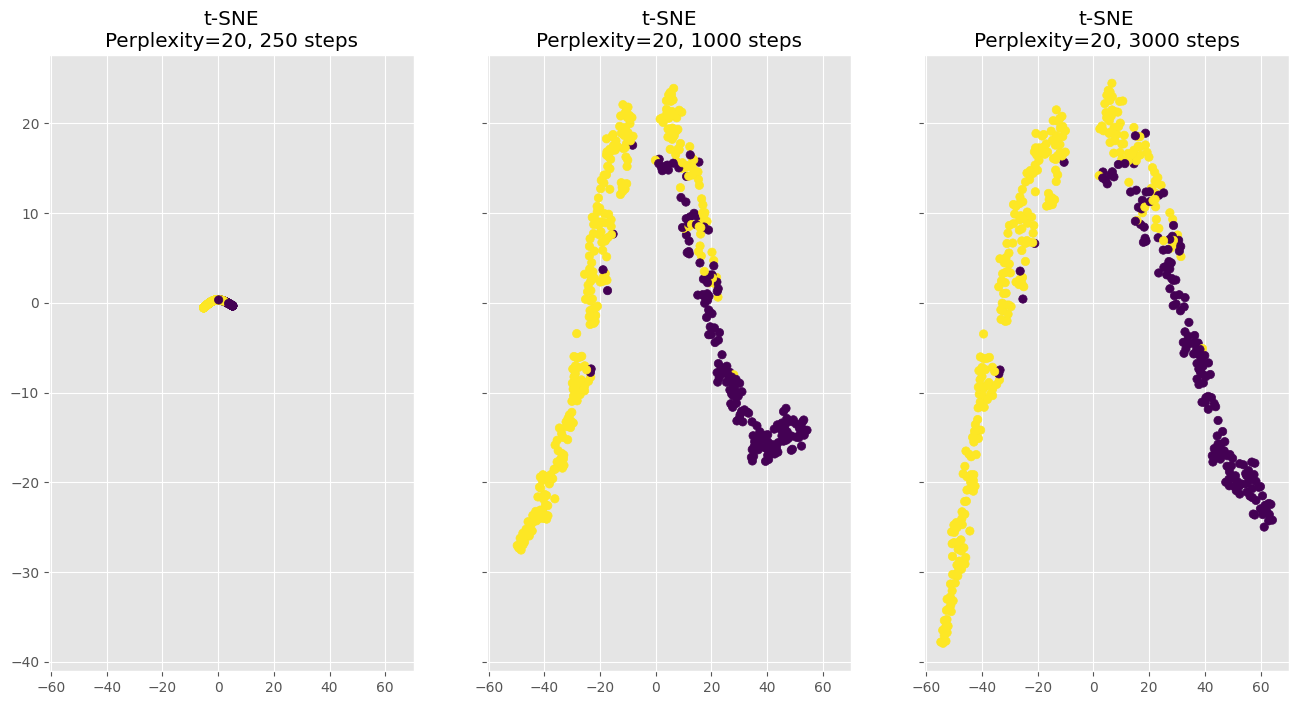

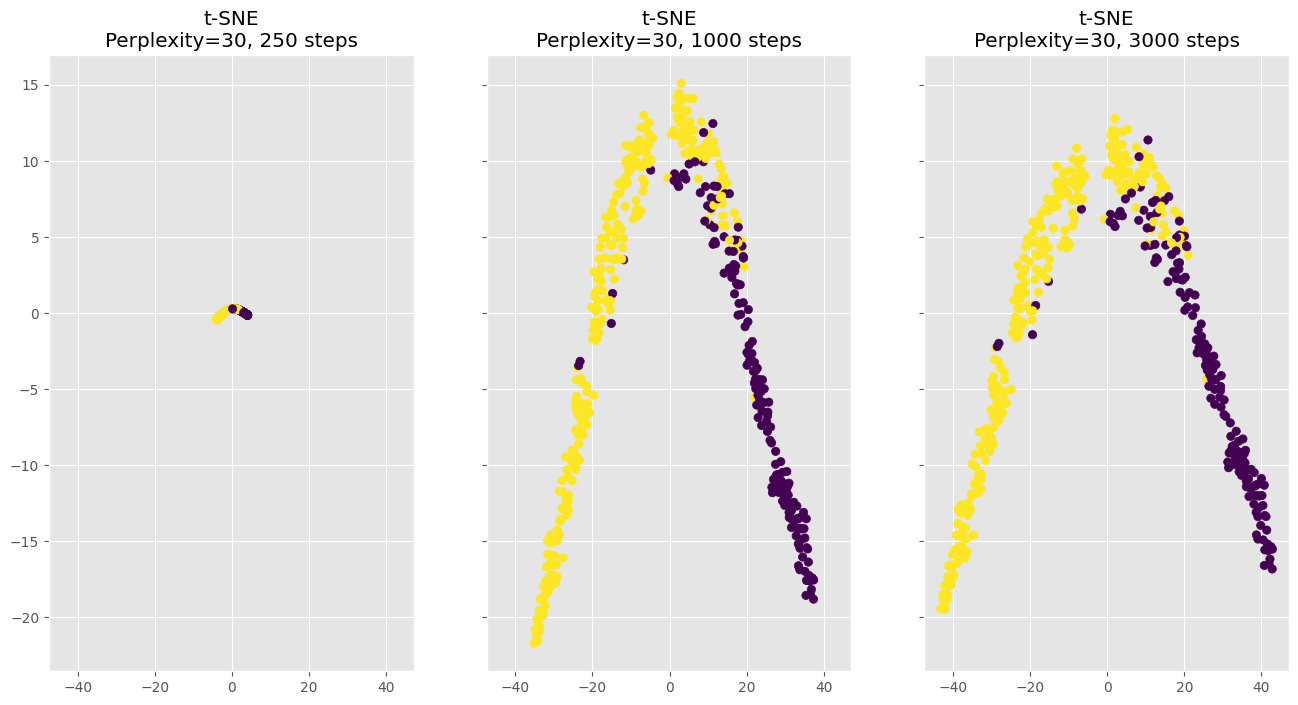

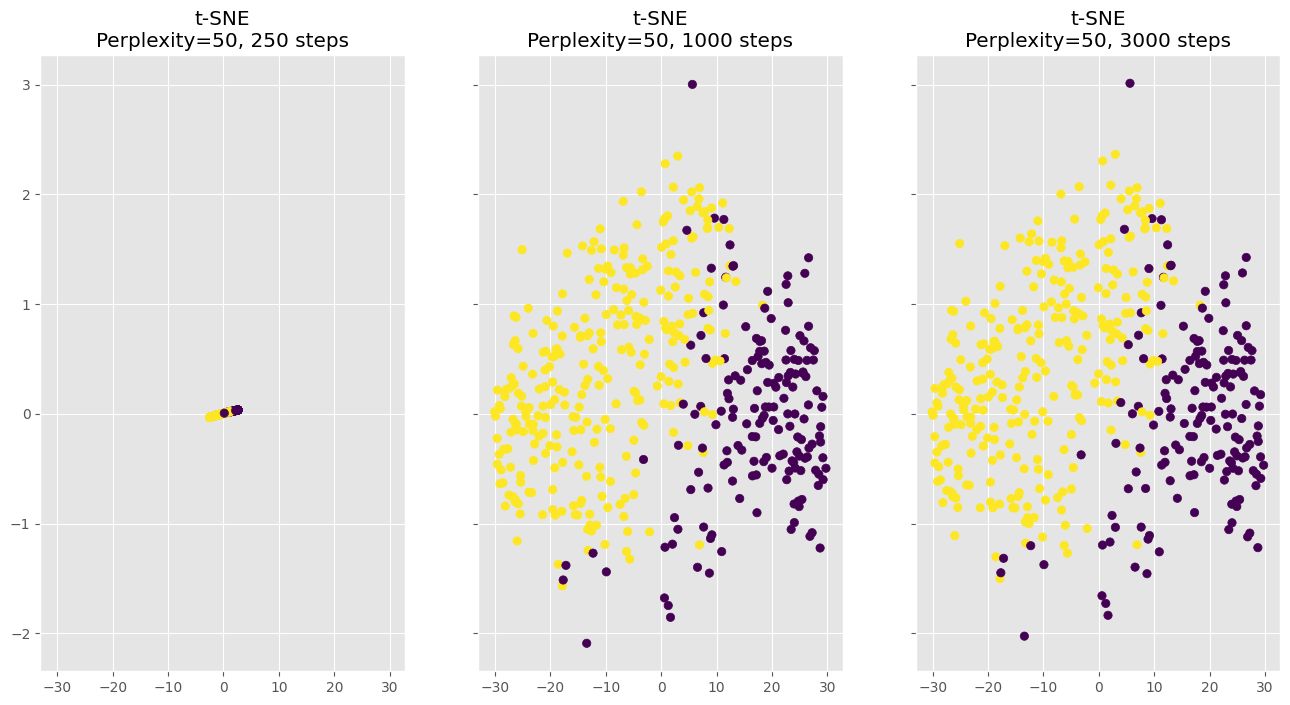

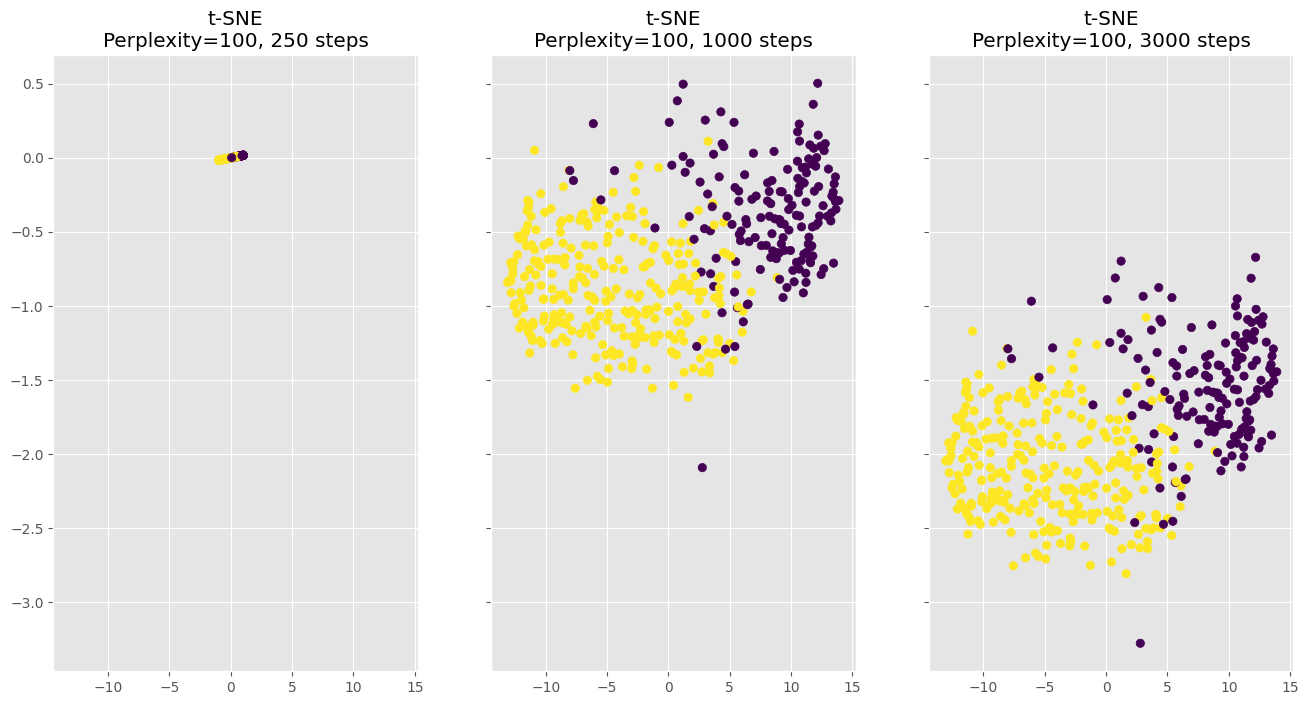

In [14]:
tsne_embeddings = []
for perplexity in perplexities:
    fig, axes = plt.subplots(nrows=1, ncols=len(iters), figsize=(16, 8), sharex=True, sharey=True)
    for i,n in enumerate(iters):
        # Create an embedding using t-SNE using number of iterations (n), a random state of 0 and specified perplexity
        # Save that embedding to tsne_embedding
        # YOUR CODE HERE
        tsne = TSNE(n_iter=n, perplexity=perplexity, random_state=0)
        tsne_embedding = tsne.fit_transform(X_train, y_train)
        axes[i].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=y_train)
        axes[i].set_title(f"t-SNE\nPerplexity={perplexity}, {n} steps")
    tsne_embeddings.append(tsne_embedding)
    plt.show()

In [15]:
assert tsne_embedding.shape == (455,2)
assert len(tsne_embeddings) == 5

Next, we'll calculate the [spectral embedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html#sklearn.manifold.SpectralEmbedding) for the data. You can use the [SpectralEmbedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html?highlight=spectralembedding) class from scikit-learn.

> *Optional* - select an affinity to create the affinity matrix for the manifold graph. You can select a [pairwise distance method](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html) to call with [squareform](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.squareform.html#scipy.spatial.distance.squareform). 

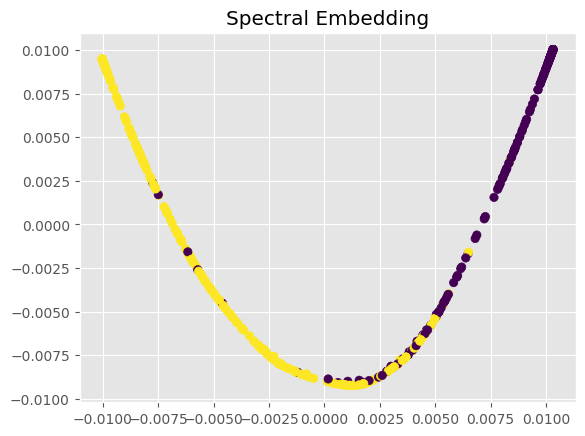

In [17]:
# Now use Spectral Embeddings to calculate the embedding of the data
# Save the embedding to spectral_embedding, and transformer to spectral
# YOUR CODE HERE
spectral = SpectralEmbedding(n_components=2)

spectral_embedding = spectral.fit_transform(X_train)

plt.scatter(spectral_embedding[:, 0], spectral_embedding[:, 1], c=y_train)
plt.title("Spectral Embedding")
plt.show()

In [18]:
assert spectral
assert spectral_embedding.shape == (455, 2)

Next, we'll repeat this process with Linear Discriminant Analysis. You can use the [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) class from scikit-learn.

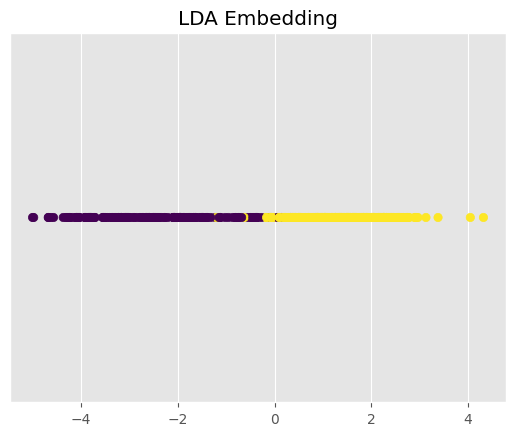

In [20]:
# Save the embedding to lda_embedding, and transformer to lda
# YOUR CODE HERE
lda = LinearDiscriminantAnalysis(n_components=1)

lda_embedding = lda.fit_transform(X_train, y_train)

plt.scatter(lda_embedding, [0]*len(lda_embedding), c=y_train)
plt.yticks([])
plt.title("LDA Embedding")
plt.show()

In [21]:
assert lda
assert lda_embedding.shape == (455, 1)

We will now investigate how these methods perform on classification with a basic Linear SVM Classifier.

Since t-SNE, and Spectral Embedding do not save a projection, we can not transform the test data using the trained model. You will need to concatenate both X_train and X_test then select the training and test rows from the embeddings after. The [guide on merging dataframes](http://pandas.pydata.org/pandas-docs/stable/merging.html) may be useful.


In [44]:
# Select a perplexity for t-SNE and save it to selectedPerplexity
# Create 2 embeddings `tsne_train` and `tsne_test` using a new TSNE model saved to `tsne_model`
#        fitted and transforming the whole data then manually selecting each group
# Create a LinearSVC model with default settings fitted to the training embeddings
#       save it as tsne_svc
# YOUR CODE HERE
selectedPerplexity = 50

tsne_model = TSNE(n_iter=3000, perplexity=selectedPerplexity)

combined_X = pd.concat([X_train, X_test])

tsne_all = tsne_model.fit_transform(combined_X)

tsne_train = tsne_all[:len(X_train)]
tsne_test = tsne_all[len(X_train):]

tsne_svc = LinearSVC()
tsne_svc.fit(tsne_train, y_train)

/Users/benfunk/DataspellProjects/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/benfunk/DataspellProjects/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [45]:
# Create 2 embeddings `spectral_train` and `spectral_test` using a new Spectral Embedding model
#        saved to `spectral_model` fitted and transforming the whole data then manually 
#        selecting each group.
# Create a LinearSVC model with default settings fitted to the training embeddings
#       save it as spectral_svc
# YOUR CODE HERE
spectral_model = SpectralEmbedding(n_components=2) 

spectral_all = spectral_model.fit_transform(pd.concat([X_train, X_test]))

spectral_train = spectral_all[:len(X_train)]
spectral_test = spectral_all[len(X_train):]

spectral_svc = LinearSVC()
spectral_svc.fit(spectral_train, y_train)


/Users/benfunk/DataspellProjects/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [46]:
# Create an embedding `lda_test` from the test data using the lda model you trained
# Create a LinearSVC model with default settings fitted to the training embeddings
#       save it as lda_svc
# YOUR CODE HERE
lda_test = lda.transform(X_test)

lda_svc = LinearSVC()
lda_svc.fit(lda.transform(X_train), y_train)

/Users/benfunk/DataspellProjects/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [47]:
assert selectedPerplexity >= 2
assert selectedPerplexity <= 100
assert tsne_model
assert tsne_model.n_components == 2
assert tsne_model.perplexity == selectedPerplexity
assert tsne_model.n_iter >= 3000
assert tsne_train.shape == (455,2)
assert tsne_test.shape == (114,2)

assert spectral_model
assert spectral_model.n_components == 2
assert spectral_train.shape == (455,2)
assert spectral_test.shape == (114, 2)

assert lda_test.shape == (114, 1)

assert tsne_svc
assert tsne_svc.coef_.shape[1] == 2
assert spectral_svc
assert spectral_svc.coef_.shape[1] == 2
assert lda_svc
assert lda_svc.coef_.shape[1] == 1

In [48]:
print(f"The t-SNE embedding + Linear SVM scores an F-1 = {f1_score(y_test, tsne_svc.predict(tsne_test)):.3f}.")
print(f"The Spectral Embedding + Linear SVM scores an F-1 = {f1_score(y_test, spectral_svc.predict(spectral_test)):.3f}.")
print(f"The LDA + Linear SVM scores an F-1 = {f1_score(y_test, lda_svc.predict(lda_test)):.3f}.")

The t-SNE embedding + Linear SVM scores an F-1 = 0.963.
The Spectral Embedding + Linear SVM scores an F-1 = 0.740.
The LDA + Linear SVM scores an F-1 = 0.978.


Can you think of why we get these scores for the respective models? What happens if we train the same Linear SVM model on all the features?

In [43]:
all_feat_score = f1_score(y_test, LinearSVC().fit(X_train, y_train).predict(X_test))
print(f"The Linear SVM with all features scores an F-1 = {all_feat_score:.3f}.")

The Linear SVM with all features scores an F-1 = 0.956.


/Users/benfunk/DataspellProjects/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/benfunk/DataspellProjects/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Grading
The following code block is purely used for grading. If you find any error, you can ignore. DO NOT MODIFY THE CODE BLOCK BELOW.

In [ ]:
# Autograding with Otter Grader
import otter
grader = otter.Notebook()
grader.check_all()

## Feedback

In [ ]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    return 'this was interesting to see the transformations'